24.488191200528643
15.590801087768595
466.1971995389924
474.37495356310524


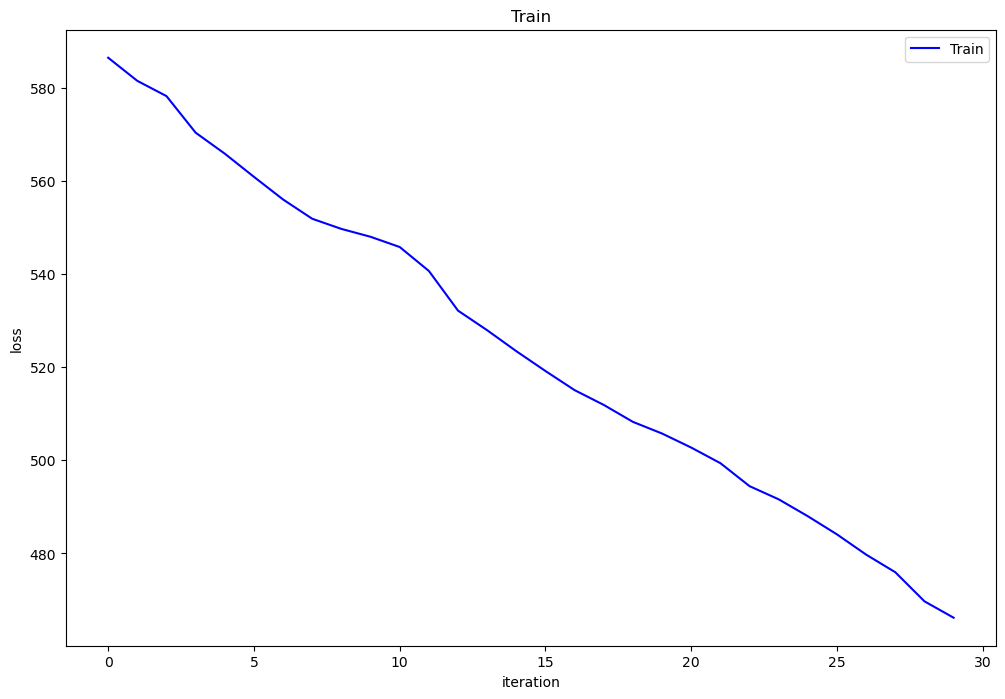

27.160172767455673
16.763287117591695


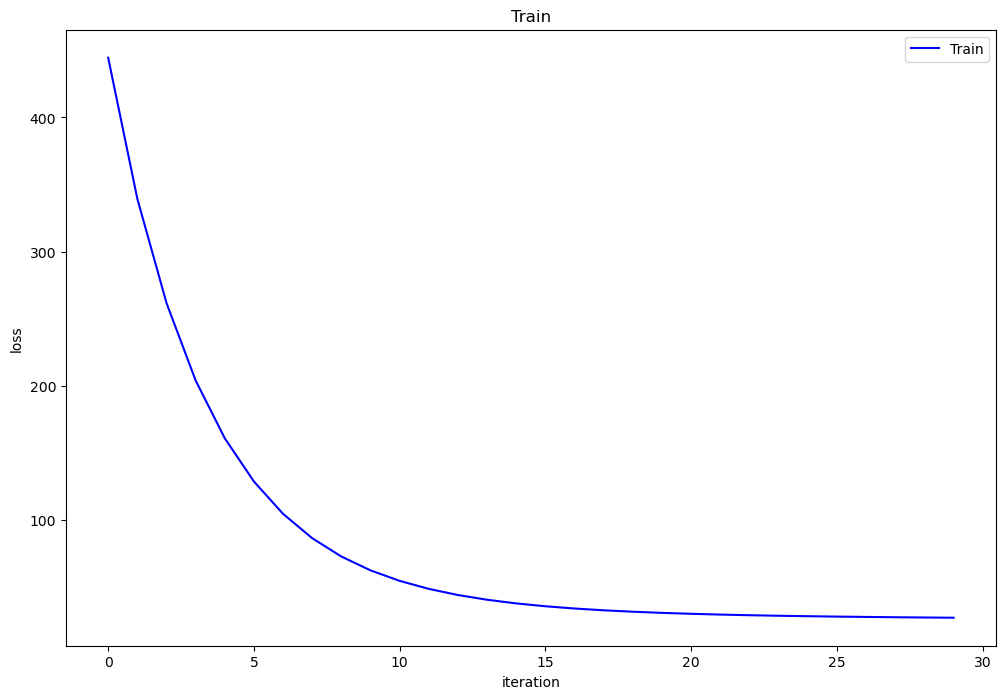

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import math
import random

# 读取实验数据
X, y = sd.load_svmlight_file('housing_scale.txt',n_features = 13)

# 将数据集切分为训练集和验证集
X_train, X_valid, y_train, y_valid = sms.train_test_split(X, y)

# 将稀疏矩阵转为ndarray类型
X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)#转化为1列



# 选取一个Loss函数，计算训练集的Loss函数值，记为loss
def compute_loss(X, y, theta):
    hx = X.dot(theta)#w点乘X
    error = np.power((hx - y), 2).mean()
    return error

X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis = 1)
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)), X_valid), axis = 1)

# 闭式解函数
def normal_equation(X, y):
    return (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)

theta = normal_equation(X_train, y_train)

loss_train = compute_loss(X_train, y_train, theta)


loss_valid = compute_loss(X_valid, y_valid, theta)

print(loss_train)
print(loss_valid)

##ques2


#梯度函数
def gradient(X, y, theta):
    return X.T.dot(X.dot(theta) - y)



#随机梯度下降
def random_descent(X, y, theta, alpha, iters, X_valid, y_valid):
    n=X.shape
    loss_train = np.zeros((iters,1))
    loss_valid = np.zeros((iters,1))
    for i in range(iters):
        #随机选择一个样本
        num=np.random.randint(n,size=1)
        x_select=X[num,:]
        y_select=y[num,0]
        grad = gradient(x_select, y_select, theta)
        theta = theta - alpha * grad
        loss_train[i] = compute_loss(X, y, theta)
        loss_valid[i] = compute_loss(X_valid, y_valid, theta)
    return theta, loss_train, loss_valid



#全梯度下降
def descent(X, y, theta, alpha, iters, X_valid, y_valid):
    loss_train = np.zeros((iters,1))
    loss_valid = np.zeros((iters,1))
    for i in range(iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        loss_train[i] = compute_loss(X, y, theta)
        loss_valid[i] = compute_loss(X_valid, y_valid, theta)
    return theta, loss_train, loss_valid


# 线性模型参数初始化，可以考虑全零初始化，随机初始化或者正态分布初始化。
theta = np.zeros((14, 1))

# 随机梯度下降
alpha = 0.001
iters = 30
opt_theta, loss_train, loss_valid = random_descent(X_train, y_train, theta, alpha, iters, X_valid, y_valid)
#选取矩阵中最小的值
print(loss_train.min())
print(loss_valid.min())



iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Train')
# plt.plot(iteration, loss_valid, 'r', label='Valid')
plt.legend()
plt.show()


# 线性模型参数初始化，可以考虑全零初始化，随机初始化或者正态分布初始化。
theta = np.zeros((14, 1))

# 全批量梯度下降
alpha = 0.001
iters = 30
opt_theta, loss_train, loss_valid = descent(X_train, y_train, theta, alpha, iters, X_valid, y_valid)
#选取矩阵中最小的值
print(loss_train.min())
print(loss_valid.min())



iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Train')
# plt.plot(iteration, loss_valid, 'r', label='Valid')
plt.legend()
plt.show()